<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0-Data-Wrangling" data-toc-modified-id="0-Data-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>0 Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Spike-&amp;-Trials-&amp;-Behavior-info-✔" data-toc-modified-id="Spike-&amp;-Trials-&amp;-Behavior-info-✔-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Spike &amp; Trials &amp; Behavior info ✔</a></span></li><li><span><a href="#Trial-times-and-differences-in-times-✔" data-toc-modified-id="Trial-times-and-differences-in-times-✔-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Trial times and differences in times ✔</a></span></li></ul></li><li><span><a href="#1-EDA" data-toc-modified-id="1-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1 EDA</a></span><ul class="toc-item"><li><span><a href="#Plot-Spike-Trains-for-single-✔" data-toc-modified-id="Plot-Spike-Trains-for-single-✔-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Spike Trains for single ✔</a></span><ul class="toc-item"><li><span><a href="#plot-spike-train-✔" data-toc-modified-id="plot-spike-train-✔-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>plot spike train ✔</a></span></li><li><span><a href="#spike-train-0-=-event-X-✔" data-toc-modified-id="spike-train-0-=-event-X-✔-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>spike train 0 = event X ✔</a></span></li></ul></li><li><span><a href="#Spike-Train-&amp;-Histogram-for-sub-events" data-toc-modified-id="Spike-Train-&amp;-Histogram-for-sub-events-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spike Train &amp; Histogram for sub events</a></span><ul class="toc-item"><li><span><a href="#batch-plot-for-all-clusters-and-all-reword-configurations" data-toc-modified-id="batch-plot-for-all-clusters-and-all-reword-configurations-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>batch plot for all clusters and all reword configurations</a></span></li><li><span><a href="#Save-all-Plots-&amp;-Create-Report" data-toc-modified-id="Save-all-Plots-&amp;-Create-Report-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Save all Plots &amp; Create Report</a></span><ul class="toc-item"><li><span><a href="#Alternative-method-create-latex-file" data-toc-modified-id="Alternative-method-create-latex-file-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Alternative method create latex file</a></span></li></ul></li></ul></li><li><span><a href="#Spike-Frequency-Sliding-Window" data-toc-modified-id="Spike-Frequency-Sliding-Window-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Spike Frequency Sliding Window</a></span><ul class="toc-item"><li><span><a href="#something-else" data-toc-modified-id="something-else-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>something else</a></span></li></ul></li><li><span><a href="#Workspace" data-toc-modified-id="Workspace-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Workspace</a></span></li></ul></li></ul></div>

# EDA of Spike sorted with kilosort and manually clustered with phy2

Dataset:
**JG14_190621**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
import importlib
import os
import sys
import platform
import qgrid


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

## 0 Data Wrangling

Loading necessary files

folder = 'C:\Users\Nutzer\Google Drive\1 Uni\1.3 Uni Projekte\Masterarbeit Laborarbeit Neuroscience\Data   
Analysis\JG14_190621\electrophysiology'; 
spike_times.npy  
spike_clusters.npy  
cluster_group.tsv  
cluster_info.tsv  


In [6]:
session = 'JG14_190621'
gamble_side = 'right'

if platform.system() == 'Linux':
    # Linux
    os.chdir("/home/max/ExpanDrive/Google Drive/3.1 Code Repository/1.4-klausbergerlab-spikes/")
    from spikes_class import SpikeAnalysis
    folder = "/home/max/ExpanDrive/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis/JG14_190621"
elif platform.system() == 'Windows':
    # windows
    os.chdir(r"C:\Users\User\Google Drive\3.1 Code Repository\1.4-klausbergerlab-spikes")
    from spikes_class import SpikeAnalysis
    folder = r"C:\Users\User\Google Drive\3 Projekte\Masterarbeit Laborarbeit Neuroscience\1 Data Analysis\JG14_190621"

spikes = SpikeAnalysis(session, folder, gamble_side)
spikes.trials_df.loc[0:6, 'select'] = False
spikes.trials_df.loc[215:, 'select'] = False

# add probability column
#spikes.trials_df.loc[0:'probability']

---

### Spike & Trials & Behavior info ✔
from phenosys necoded in ttl
- all times are in sampling rate (20k per Second)
- Infromation about what was encoded from phenosys (behavior) to intern recording [coding of ttl signal phenosys](https://www.notion.so/4b534b46cb5f4611b31b6b0ac0b1712b)

In [4]:
qgrid.show_grid(spikes.spikes_df)

,,cluster,spike_times
global index,cluster index,,
0,0,182,147
1,0,51,215
2,0,54,218
3,0,99,257
4,0,120,287
...,...,...,...
622358,12892,106,22702646
622359,1292,82,22702655
622360,5320,94,22702670


In [15]:
qgrid.show_grid(spikes.trials_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Trial times and differences in times ✔
- clean up trials -> only use interesting ones

<IPython.core.display.Javascript object>


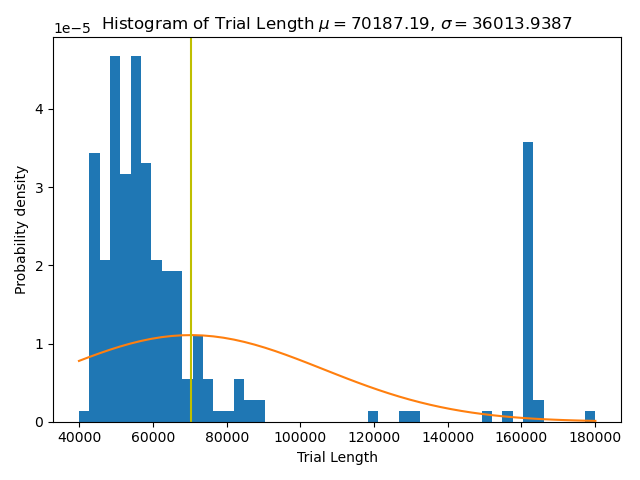

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x216e87aeb48>)

In [11]:
spikes.plt_trial_hist_and_fit(spikes.trials_df.loc[:, 'length'])

<IPython.core.display.Javascript object>


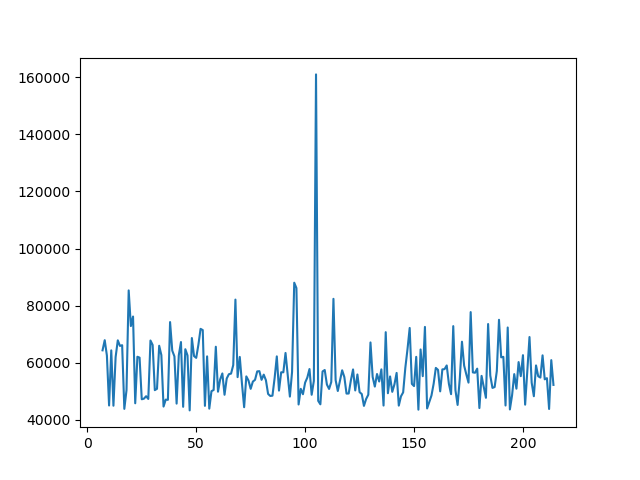

In [12]:
spikes.plt_trial_length()

In [4]:
#spikes.trials_df.loc[np.r_[0:6, 215:], 'select']
spikes.trials_df.loc[0:6, 'select'] = False
spikes.trials_df.loc[215:, 'select'] = False
spikes.trials_df

,start,cue,sound,openl,reward,iti,end,event,length_ms,length,select
trial,,,,,,,,,,,
1,184261,204966,205627,206346,346501,346782,347017,0,8137.80,162756,False
2,347296,367357,367997,368675,469942,488083,508307,5,8050.55,161011,False
3,508590,528631,529285,529965,540668,558808,579008,5,3520.90,70418,False
4,579268,599314,599969,600650,613871,614030,634233,6,2748.25,54965,False
5,751059,771123,771761,772445,780009,783821,804022,8,2648.15,52963,False
...,...,...,...,...,...,...,...,...,...,...,...
260,21715394,21735452,21736093,21736773,21876901,21877101,21877324,0,8096.50,161930,False
261,21877585,21897643,21898282,21898964,22033712,22037470,22057672,7,9004.35,180087,False
262,22057937,22077977,22078634,22079315,22103174,22103335,22123538,6,3280.05,65601,False


<IPython.core.display.Javascript object>


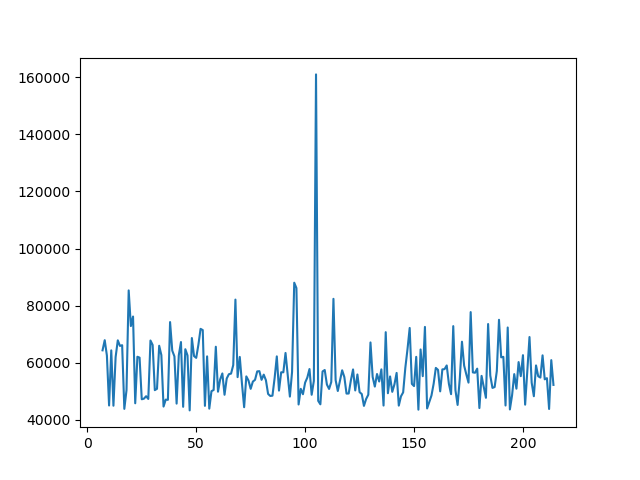

In [9]:
spikes.plt_trial_length()

<IPython.core.display.Javascript object>


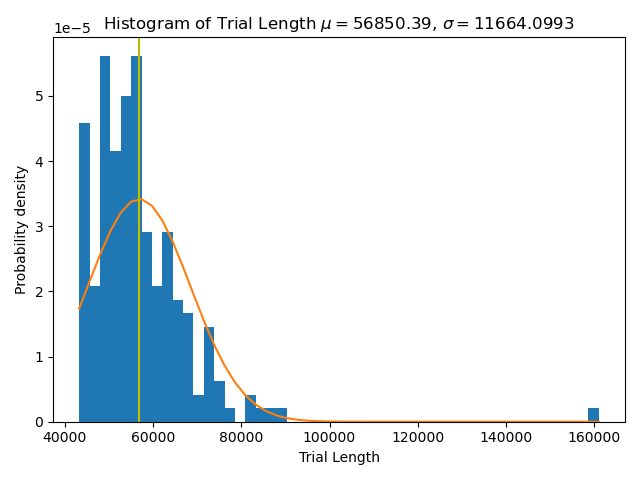

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x216e6958848>)

In [10]:
spikes.plt_trial_hist_and_fit(
    spikes.trials_df.loc[spikes.trials_df.loc[:, 'select'], 'length'])

## 1 EDA
Exploring the Dataset to find out 
1. how trials are different
2. firing behavior of cluster for different trials
3. z scored firing of cluster for all trials
4. comparison between clusters

### Plot Spike Trains for single ✔

#### plot spike train ✔

<IPython.core.display.Javascript object>


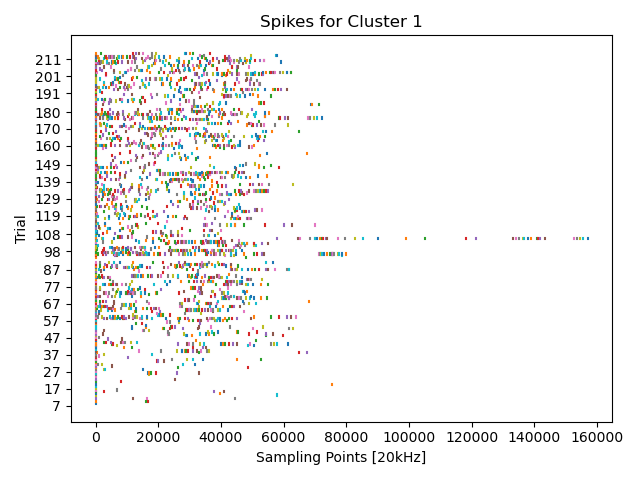

In [3]:
cluster = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == 1]['spike_times']
fig, ax = spikes.plt_spike_train(cluster, spikes.trials_df)
plt.show()

#### spike train 0 = event X ✔

<IPython.core.display.Javascript object>


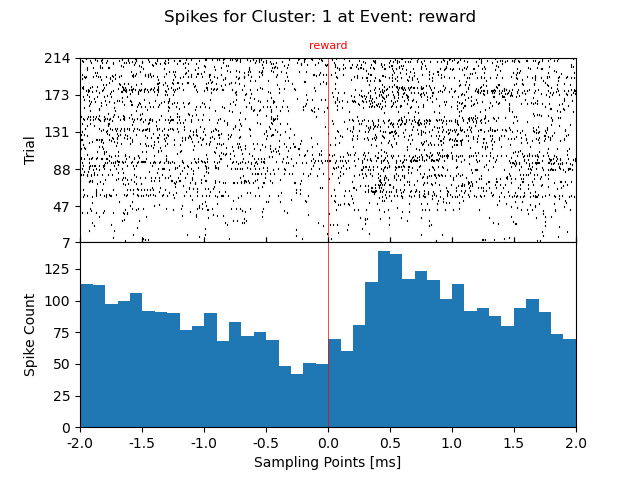

In [3]:
fig, ax = spikes.plt_spike_train_hist(1, spikes.trials_df[spikes.trials_df['select']==True], 'reward', 2000)

#ax[1].set_xlim([-40000, 40000])
plt.show()

<IPython.core.display.Javascript object>


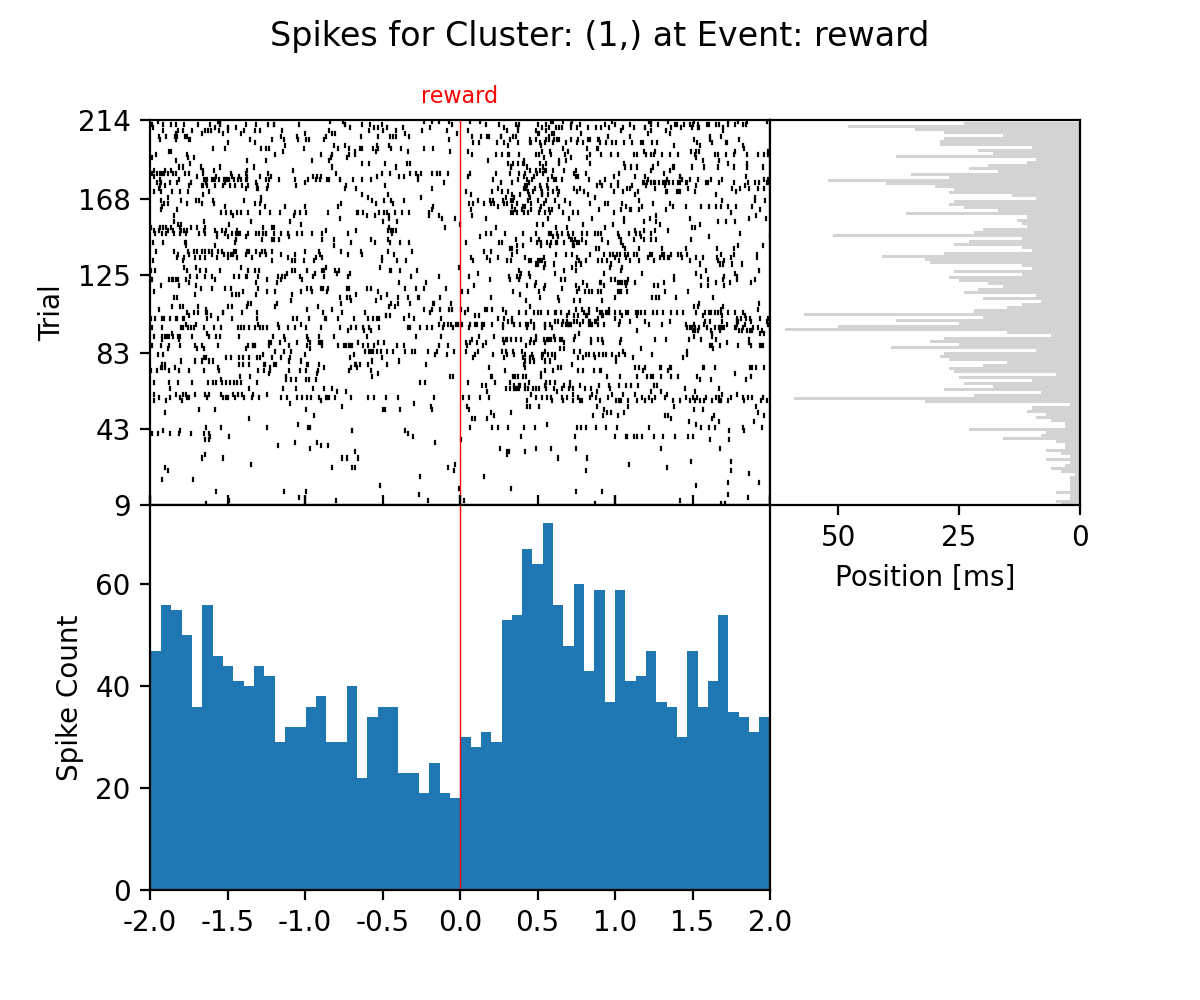

In [4]:
cluster = 1, 
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]
#selected_trials = spikes.trials_df[spikes.trials_df['select']==True]
event = 'reward'
window = 2000

fig, (ax1, ax2, ax3) = spikes.plt_spike_train_hist_bar(cluster, selected_trials, event, window)
plt.show()

### Spike Train & Histogram for sub events

#### batch plot for all clusters and all reword configurations

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, gridspec_kw={'hspace': 0, 'wspace':2})
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = axs
axs1 = (ax1, ax3)
axs2 = (ax2, ax4)
axs3 = (ax5, ax7)
axs4 = (ax6, ax8)
plt_new_new(1, selected_trials, 'reward', 2, axs1)
plt_new_new(1, selected_trials, 'reward', 2, axs2)
plt_new_new(1, selected_trials, 'reward', 2, axs3)
plt_new_new(1, selected_trials, 'reward', 2, axs4)

fig.tight_layout()
plt.show()

#### Save all Plots & Create Report

In [10]:
import matplotlib as mpl
mpl.use("Agg")  # Prevent showing stuff

spikes.save_plt_spike_train_hist_reward(2000, update=False)

	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 0 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 1 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 3 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 4 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save si

	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 71 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 73 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 75 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 76 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward sav

	plot no-reward save side finished
cluster 137 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 138 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 141 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 142 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 151 finished
	plot reward (both sides

In [4]:
import matplotlib as mpl
mpl.use("Agg")  # Prevent showing stuff

spikes.save_plt_spike_train_hist_bar_reward(2000, update=False)

	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 0 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 1 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 3 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 4 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save si

	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 71 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 73 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 75 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 76 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward sav

	plot no-reward save side finished
cluster 137 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 138 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 141 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 142 finished
	plot reward (both sides) finished
	plot reward gambl side finished
	plot reward save side finished
	plot no-reward (both sides) finished
	plot no-reward gambl side finished
	plot no-reward save side finished
cluster 151 finished
	plot reward (both sides

In [ ]:
%matplotlib notebook

In [3]:
included_sections = ['spike_trains_and_histogram']
filename = (session + "-Report")
spikes.create_report(included_sections)


starting package maintenance...
installation directory: /home/max/.miktex/texmfs/install
package repository: https://mirror.easyname.at/ctan/systems/win32/miktex/tm/packages/
visiting repository https://mirror.easyname.at/ctan/systems/win32/miktex/tm/packages/...
repository type: remote package repository
loading package repository manifest...
downloading https://mirror.easyname.at/ctan/systems/win32/miktex/tm/packages/miktex-zzdb1-2.9.tar.lzma...
0.20 MB, 95.53 Mbit/s
package repository digest: bd5068f7198a760c9aa3dca2b3ddf9ed
going to download 371154 bytes
going to install 31 file(s) (1 package(s))
downloading https://mirror.easyname.at/ctan/systems/win32/miktex/tm/packages/latexmk.tar.lzma...
0.37 MB, 433.15 Mbit/s
extracting files from latexmk.tar.lzma...
Rc files read:
  NONE
Latexmk: This is Latexmk, John Collins, 17 Apr. 2020, version: 4.69a.
Rule 'pdflatex': The following rules & subrules became out-of-date:
      'pdflatex'
------------
Run number 1 of rule 'pdflatex'
-------

CalledProcessError: Command '['latexmk', '--pdf', '--interaction=nonstopmode', '/home/max/ExpanDrive/Google Drive/3.1 Code Repository/1.4-klausbergerlab-spikes/JG14_190621-Report.tex']' returned non-zero exit status 12.

##### Alternative method create latex file

In [3]:
latex_dict = {}
with open('spike_report_template.tex', 'r') as f:
    keys = ["preample", "title", "after_title", "rest"]
    key = keys[0]
    value = ""
    k = 1
    for line in f.readlines():
        if "%##end" not in line:
            value += line
        else:
            latex_dict[key]=value
            key = keys[k]
            value = ""
            k += 1
latex_dict.pop('title')

'\n% title and stuff\n\\title{\\textbf{Report for JG...}}\n'

In [112]:
with open('filename.json', 'w', encoding='utf8') as json_file:
    json.dump(latex_dict, json_file, indent=4, ensure_ascii=False)

In [5]:
# create latex file
tex_title = r"\title{\textbf{Report for Session: " + session.replace('_', r"\_") + "}}\n"
tex_file_path = folder + "/figures/spikes-report.tex"


with open(tex_file_path, 'w', encoding='utf8') as tex_file:
    tex_file.write(latex_dict['preample'])
    tex_file.write(tex_title)
    tex_file.write(latex_dict['after_title'])
    for cluster in spikes.cluster_df.loc[spikes.cluster_df['group']=='good'].index[0:1]:
        tex_section = r"\subsection*{Cluster " + str(cluster) + "}\n"
        
        tex_summary = (r"% table for all spikes and summary"+"\n"+
                       r"\begin{tabularx}{\textwidth}{X X}"+"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +"-reward.png}} & "+"\n"+
                       r"  \begin{tabular}[t]{ll}"+"\n"+
                       r"    Summary: \\"+"\n"+
                       r"    \hline"+"\n"+
                       r"    \small{Gamble Side:} & \small{" +
                       gambl_side +
                       r"} \Tstrut\\"+"\n"+
                       r"  \end{tabular}\\"+"\n"+
                       r"\end{tabularx}"+"\n"+
                       r"\bigskip"+"\n"
                      )
        
        tex_details = (r"% table for detailed reward events"+"\n"+
                       r"\begin{tabularx}{\textwidth}{X | X}"+"\n"+
                       "  % title\n"+
                       r"  Gambl Side & Save Side \\"+"\n"+
                       "  %reward\n"+
                       r"  Reward & \Tstrut \\"+"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-reward-gambl.png}} &" +"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-reward-save.png}}\Bstrut \\"+"\n"+
                       r"  \hline"+"\n"+
                       "  % no-reward"+"\n"+
                       r"  No-reward & \Tstrut \\"+"\n"+
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-no-reward-gambl.png}} &" +"\n"+  
                       r"  \parbox[c]{1em}{\includegraphics[width=0.5\textwidth]{spikes/spike-train-hist-event/cluster-"+ str(cluster) +r"-no-reward-gambl.png}} \\"+"\n"+ 
                       r"\end{tabularx}"+"\n"+
                       "\n"+
                       r"\newpage"+"\n"
                      )

        tex_file.write("\n%========================\n")
        tex_file.write(tex_section)
        tex_file.write(tex_summary)
        tex_file.write(tex_details)      
    tex_file.write(r"\end{document}")

### Spike Frequency Sliding Window

In [112]:
spikes.spike_df.index.name = 'global index'
spikes.spike_df

,cluster,spike_times
global index,,
0,182,147
1,51,215
2,54,218
3,99,257
4,120,287
...,...,...
622358,106,22702646
622359,82,22702655
622360,94,22702670


In [3]:
# non-sliding bin:


# windows width in ms
window = 50
# bin width in clicks

# calculate start of each bin
def bin_count_per_cluster(window, cluster, step=None):
    bwidth_cl = window*20
    cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
    start = cluster.iloc[0].astype(int)
    end = cluster.iloc[-1].astype(int)
    if step == None:
        step = bwidth_cl+1
    else:
        step = step*20000
    # calculate
    # start of each bin
    bin_starts = np.arange(start, end+1-bwidth_cl, step)
    # end of each bin
    bin_ends = bin_starts + bwidth_cl
    # calculate index of last spike for each bin end
    last_idx = cluster.searchsorted(bin_ends, side='left').astype(int)
    # calculate index of first spike for each bin start
    first_idx = cluster.searchsorted(bin_starts, side='left')
    # return number of indexes in between start and end = number of spikes in between
    df = pd.DataFrame({'count':(last_idx - first_idx), 'start index':first_idx, 'bin end time':bin_ends ,'last spike in bin':cluster.iloc[last_idx-1].values})
    df.index.name = 'bin'
    return df



In [4]:
count = bin_count_per_cluster(50, 0)
count

,count,start index,bin end time,last spike in bin
bin,,,,
0,1,0,1892,892
1,0,1,2893,892
2,1,1,3894,3312
3,1,2,4895,3935
4,1,3,5896,5770
...,...,...,...,...
22671,0,1849,22695563,22669863
22672,0,1849,22696564,22669863
22673,0,1849,22697565,22669863


In [6]:
spikes.trials_df

,start,cue,sound,openl,reward,iti,end,event,length_ms,length,select
trial,,,,,,,,,,,
1,184261,204966,205627,206346,346501,346782,347017,0,8137.80,162756,False
2,347296,367357,367997,368675,469942,488083,508307,5,8050.55,161011,False
3,508590,528631,529285,529965,540668,558808,579008,5,3520.90,70418,False
4,579268,599314,599969,600650,613871,614030,634233,6,2748.25,54965,False
5,751059,771123,771761,772445,780009,783821,804022,8,2648.15,52963,False
...,...,...,...,...,...,...,...,...,...,...,...
260,21715394,21735452,21736093,21736773,21876901,21877101,21877324,0,8096.50,161930,False
261,21877585,21897643,21898282,21898964,22033712,22037470,22057672,7,9004.35,180087,False
262,22057937,22077977,22078634,22079315,22103174,22103335,22123538,6,3280.05,65601,False


In [11]:
#split bin count per cluster for each trial & count over all trials
end = spikes.trials_df['end']
trial_end_idx = count['bin end time'].values.searchsorted(end, side='left').astype(int)
trial_end_idx = trial_end_idx -1
trial_end_idx

array([  344,   505,   576,   631,   801,   860,   924,   992,  1055,
        1100,  1229,  1274,  1399,  1497,  1563,  1630,  1674,  1765,
        1851,  1924,  2019,  2065,  2202,  2264,  2391,  2438,  2498,
        2545,  2613,  2722,  2911,  2984,  3068,  3131,  3176,  3233,
        3350,  3440,  3505,  3567,  3613,  3749,  3816,  3861,  4101,
        4332,  4375,  4493,  4605,  4719,  4847,  4919,  4991,  5119,
        5191,  5235,  5334,  5384,  5450,  5524,  5615,  5688,  5737,
        5818,  5901,  5972,  6031,  6114,  6169,  6254,  6307,  6351,
        6427,  6481,  6532,  6644,  6699,  6756,  6872,  6927,  6983,
        7037,  7112,  7161,  7209,  7271,  7357,  7408,  7465,  7522,
        7585,  7633,  7759,  7847,  7933,  7979,  8030,  8141,  8194,
        8277,  8342,  8391,  8472,  8645,  8875,  8924,  8981,  9039,
        9092,  9143,  9196,  9291,  9345,  9395,  9459,  9541,  9591,
        9640,  9694,  9752,  9802,  9858,  9908,  9957, 10019, 10066,
       10115, 10182,

In [12]:
trial_end_bins_df = pd.DataFrame({'end bin idx':trial_end_idx}, index=spikes.trials_df.index)

In [7]:
trial_end_bins_df

NameError: name 'trial_end_bins_df' is not defined

In [14]:

window = 50
cluster = 0
bwidth_cl = window*20
cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
start = cluster.iloc[0].astype(int)
end = cluster.iloc[-1].astype(int)
step = bwidth_cl+1

# calculate
# start of each bin
bin_starts = np.arange(start, end+1-bwidth_cl, step)
# end of each bin
bin_ends = bin_starts + bwidth_cl



end = spikes.trials_df['end']
trial_end_idx = count['bin end time'].values.searchsorted(end, side='left').astype(int)
trial_end_idx = trial_end_idx -1
trial_end_bins_df = pd.DataFrame({'end bin idx':trial_end_idx}, index=spikes.trials_df.index)

test_df = pd.DataFrame(columns=['count', 'start index', 'bin end time', 'last spike in bin', 'trial'])
for trial, index in  trial_end_bins_df.iterrows():
    test = count.loc[count.index<=index['end bin idx']][:]
    test['trial']=trial
    #test_df = pd.merge(test_df, test, how="outer")
    test_df = pd.concat([test_df,test], axis=0, ignore_index=True)


,count,start index,bin end time,last spike in bin,trial
0,1,0,1892,892,1
1,0,1,2893,892,1
2,1,1,3894,3312,1
3,1,2,4895,3935,1
4,1,3,5896,5770,1
...,...,...,...,...,...
2710615,0,1818,22446314,22421063,264
2710616,0,1818,22447315,22421063,264
2710617,0,1818,22448316,22421063,264
2710618,0,1818,22449317,22421063,264


In [20]:
test_df.index.name = 'bin'
#test_df = pd.concat([test_df], keys=[test_df['trial'].values], names=['trial'])
test_df = test_df.set_index('trial', append=True, inplace=True)
test_df

TypeError: unhashable type: 'numpy.ndarray'

In [8]:
Times_df = np.cumsum(np.random.randint(5, size=(100,)))
Times_df = np.unique(np.cumsum(np.random.randint(5, size=(100,))), axis=0)

Times_df = pd.DataFrame({'time':np.unique(np.cumsum(np.random.randint(5, size=(100,))), axis=0)})
Times_df

,time
0,0
1,4
2,7
3,11
4,13
5,15
6,17
7,21
8,23
9,26


In [7]:
import random
End_df = pd.DataFrame({'end time':np.unique(random.sample(range(Times_df.index.values[0], Times_df.index.values[-1]), 10))})
End_df.index.name = 'group'
End_df

,end time
group,
0,25
1,44
2,55
3,62
4,67
5,69
6,76
7,77
8,80


In [35]:
bins = list(End_df['end time'].values)
bins.insert(0,0)
bins.append(np.inf)
bins


[0, 25, 44, 55, 62, 67, 69, 76, 77, 80, 86, inf]

In [36]:
labels = list(End_df.index.values)
labels.append(10)
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [40]:
Times_df["group"] = pd.cut(Times_df.index, bins, labels=labels, right=True, include_lowest=True)

Times_df

    time group
0      3     0
1      6     0
2      8     0
3     10     0
4     12     0
5     15     0
6     17     0
7     21     0
8     23     0
9     27     0
10    29     0
11    33     0
12    36     0
13    39     0
14    41     0
15    43     0
16    44     0
17    46     0
18    49     0
19    52     0
20    55     0
21    56     0
22    57     0
23    59     0
24    61     0
25    63     0
26    64     1
27    68     1
28    72     1
29    74     1
30    76     1
31    80     1
32    81     1
33    85     1
34    89     1
35    92     1
36    94     1
37    98     1
38   100     1
39   103     1
40   106     1
41   107     1
42   109     1
43   111     1
44   115     1
45   119     2
46   120     2
47   121     2
48   122     2
49   126     2
50   128     2
51   130     2
52   132     2
53   135     2
54   136     2
55   140     2
56   144     3
57   145     3
58   146     3
59   148     3
60   150     3
61   152     3
62   155     3
63   159     4
64   162     4
65   165  

In [ ]:
window = 50
cluster = 0
bwidth_cl = window*20
cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
start = cluster.iloc[0].astype(int)
end = cluster.iloc[-1].astype(int)
step = bwidth_cl+1

# calculate
# start of each bin
bin_starts = np.arange(start, end+1-bwidth_cl, step)
# end of each bin
bin_ends = bin_starts + bwidth_cl



end = spikes.trials_df['end']
trial_end_idx = count['bin end time'].values.searchsorted(end, side='left').astype(int)
trial_end_idx = trial_end_idx -1
trial_end_bins_df = pd.DataFrame({'end bin idx':trial_end_idx}, index=spikes.trials_df.index)

In [41]:
count = bin_count_per_cluster(50, 0)
count

,count,start index,bin end time,last spike in bin
bin,,,,
0,1,0,1892,892
1,0,1,2893,892
2,1,1,3894,3312
3,1,2,4895,3935
4,1,3,5896,5770
...,...,...,...,...
22671,0,1849,22695563,22669863
22672,0,1849,22696564,22669863
22673,0,1849,22697565,22669863


In [42]:
compare = count['bin end time']
compare

bin
0            1892
1            2893
2            3894
3            4895
4            5896
           ...   
22671    22695563
22672    22696564
22673    22697565
22674    22698566
22675    22699567
Name: bin end time, Length: 22676, dtype: int32

In [66]:
bins = spikes.trials_df['end'].values
bins = np.insert(bins, 0, 0)
bins

array([       0,   347017,   508307,   579008,   634233,   804022,
         862946,   927529,   995674,  1058417,  1103660,  1232488,
        1277652,  1403018,  1501244,  1567368,  1633753,  1677815,
        1769281,  1854866,  1927952,  2023516,  2069539,  2206188,
        2268211,  2395538,  2443181,  2502505,  2550048,  2618072,
        2727219,  2915970,  2989095,  3073820,  3136723,  3181586,
        3238170,  3355277,  3446142,  3510626,  3573090,  3618993,
        3754901,  3822386,  3867168,  4107022,  4338359,  4381881,
        4500086,  4611913,  4726041,  4854449,  4926554,  4998237,
        5126284,  5198889,  5243031,  5341317,  5392000,  5457845,
        5532189,  5622619,  5696559,  5745582,  5826707,  5909072,
        5980499,  6039920,  6122285,  6177468,  6262314,  6315244,
        6359905,  6435744,  6489790,  6540872,  6653537,  6707782,
        6764984,  6881591,  6935834,  6991897,  7046002,  7121706,
        7170289,  7218971,  7280837,  7367140,  7417606,  7474

In [49]:
labels = spikes.trials_df.index.values
labels

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 18

In [54]:
print(bins.size)
print(labels.size)
print(count.index.values.size)

260
259
22676


In [63]:
count['trial'] = pd.cut(count['bin end time'], bins, labels=labels, right=True, include_lowest=True)

count


,count,start index,bin end time,last spike in bin,trial
bin,,,,,
0,1,0,1892,892,1
1,0,1,2893,892,1
2,1,1,3894,3312,1
3,1,2,4895,3935,1
4,1,3,5896,5770,1
...,...,...,...,...,...
22671,0,1849,22695563,22669863,NaN
22672,0,1849,22696564,22669863,NaN
22673,0,1849,22697565,22669863,NaN


In [71]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
count.tail(500)



,count,start index,bin end time,last spike in bin,trial
bin,,,,,
22176,0,1798,22200068,22198508,263
22177,0,1798,22201069,22198508,263
22178,0,1798,22202070,22198508,263
22179,0,1798,22203071,22198508,263
22180,0,1798,22204072,22198508,263
22181,0,1798,22205073,22198508,263
22182,0,1798,22206074,22198508,263
22183,0,1798,22207075,22198508,263
22184,0,1798,22208076,22198508,263


In [18]:
window = 50
# bin width in clicks

# calculate start of each bin
def bin_count_per_cluster(window, cluster, step=None):
    bwidth_cl = window*20
    cluster = spikes.spikes_df.loc[spikes.spikes_df['cluster']==cluster]['spike_times']
    start = cluster.iloc[0].astype(int)
    end = cluster.iloc[-1].astype(int)
    if step == None:
        step = bwidth_cl+1
    else:
        step = step*20000
    # calculate
    # start of each bin
    bin_starts = np.arange(start, end+1-bwidth_cl, step)
    # end of each bin
    bin_ends = bin_starts + bwidth_cl
    # calculate index of last spike for each bin end
    last_idx = cluster.searchsorted(bin_ends, side='left').astype(int)
    # calculate index of first spike for each bin start
    first_idx = cluster.searchsorted(bin_starts, side='left')
    # return number of indexes in between start and end = number of spikes in between
    df = pd.DataFrame({'count':(last_idx - first_idx), 'start index':first_idx, 'bin end time':bin_ends ,'last spike in bin':cluster.iloc[last_idx-1].values})
    df.index.name = 'bin'
    # add trial indexes
    bins = spikes.trials_df['end'].values
    bins = np.insert(bins, 0, 0)
    # labels
    labels = spikes.trials_df.index.values
    # add trial index
    df['trial'] = pd.cut(df['bin end time'], bins, labels=labels, right=True, include_lowest=True)
    df.set_index('trial', append=True, inplace=True)
    df = df.swaplevel(0, 1)
    return df

In [19]:
bin_count_per_cluster(50, 0)


count  start index  bin end time  last spike in bin
trial bin                                                       
1     0          1            0          1892                892
      1          0            1          2893                892
      2          1            1          3894               3312
      3          1            2          4895               3935
      4          1            3          5896               5770
...            ...          ...           ...                ...
NaN   22671      0         1849      22695563           22669863
      22672      0         1849      22696564           22669863
      22673      0         1849      22697565           22669863
      22674      0         1849      22698566           22669863
      22675      0         1849      22699567           22669863

[22676 rows x 4 columns]

In [3]:
spikes.bin_count_per_cluster(50, 0)


,,count,start index,bin end time,last spike in bin
bin,trial,,,,
0,1,1,0,1892,892
1,1,0,1,2893,892
2,1,1,1,3894,3312
3,1,1,2,4895,3935
4,1,1,3,5896,5770
...,...,...,...,...,...
22671,NaN,0,1849,22695563,22669863
22672,NaN,0,1849,22696564,22669863
22673,NaN,0,1849,22697565,22669863


In [20]:
count = bin_count_per_cluster(500, 0)

count

count  start index  bin end time  last spike in bin
trial bin                                                      
1     0         5            0         10892              10424
      1         5            5         20893              20567
      2         4           10         30894              28205
      3         4           14         40895              37597
      4         5           18         50896              50823
...           ...          ...           ...                ...
NaN   2264      3         1845      22653156           22649675
      2265      0         1848      22663157           22649675
      2266      1         1848      22673158           22669863
      2267      0         1849      22683159           22669863
      2268      0         1849      22693160           22669863

[2269 rows x 4 columns]

<IPython.core.display.Javascript object>


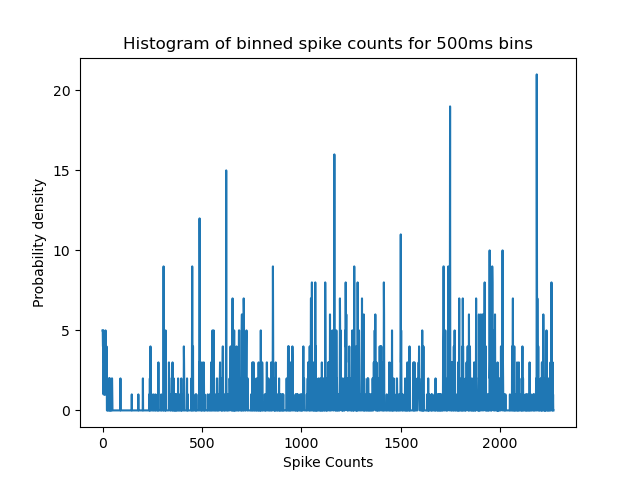

In [31]:
fig, ax = plt.subplots()
# plot histogramm
num_bins = 100
arry = pd.DataFrame({'count':count['count'].values}, index=count.index.get_level_values('bin'))
plt.plot(arry)

ax.set_xlabel('Spike Counts')
ax.set_ylabel('Probability density')
ax.set_title(f"Histogram of binned spike counts for 500ms bins")
# Tweak spacing to prevent clipping of ylabel
plt.show()

In [30]:
count.index.get_level_values('bin')

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268],
           dtype='int64', name='bin', length=2269)

In [12]:
test = count.iloc[:1000]
test

,,count,start index,bin end time,last spike in bin
bin,trial,,,,
0,1,1,0,1892,892
1,1,0,1,2893,892
2,1,1,1,3894,3312
3,1,1,2,4895,3935
4,1,1,3,5896,5770
5,1,0,4,6897,5770
6,1,0,4,7898,5770
7,1,0,4,8899,5770
8,1,0,4,9900,5770


In [9]:
test.swaplevel(0, 1)

NameError: name 'test' is not defined

In [14]:
test.index.set_levels(['trial'], level=0, inplace=True)

ValueError: On level 0, code max (999) >= length of level (1). NOTE: this index is in an inconsistent state

In [96]:
count.index.get_level_values(1)

CategoricalIndex([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
                  ...
                  nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
                 categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=True, name='trial', dtype='category', length=22676)

In [84]:
count

,,count,start index,bin end time,last spike in bin
bin,trial,,,,
0,1,1,0,1892,892
1,1,0,1,2893,892
2,1,1,1,3894,3312
3,1,1,2,4895,3935
4,1,1,3,5896,5770
...,...,...,...,...,...
22671,NaN,0,1849,22695563,22669863
22672,NaN,0,1849,22696564,22669863
22673,NaN,0,1849,22697565,22669863


#### something else

In [96]:
windows = 50
cluster = 0
step = None
bwidth_cl = window*20
cluster = spikes.spike_df.loc[spikes.spike_df['cluster']==cluster]['spike_times']
start = cluster.iloc[0].astype(int)
end = cluster.iloc[-1].astype(int)
if step == None:
    step = bwidth_cl+1
else:
    step = step*20
# calculate
# start of each bin
bin_starts = np.arange(start, end+1-bwidth_cl, step)
# end of each bin
bin_ends = bin_starts + bwidth_cl
# calculate index of last spike for each bin end
last_idx = cluster.searchsorted(bin_ends, side='left').astype(int)
# calculate index of first spike for each bin start
first_idx = cluster.searchsorted(bin_starts, side='left')
# return number of indexes in between start and end = number of spikes in between
df = pd.DataFrame({'count':(last_idx - first_idx), 'start index':first_idx, 'start time':cluster.iloc[first_idx].values})
df.index.name = 'bin'


In [87]:
cluster

global index  cluster index
21            0                     892
84            1                    3312
100           2                    3935
170           3                    5770
323           4                   10424
                                 ...   
620141        1845             22647479
620172        1846             22648258
620207        1847             22649675
620894        1848             22669863
622259        1849             22699854
Name: spike_times, Length: 1850, dtype: uint64

In [89]:
bin_starts

array([     892,     1893,     2894, ..., 22696565, 22697566, 22698567])

In [78]:
first_idx

array([   0,    1,    1, ..., 1849, 1849, 1849], dtype=int64)

In [97]:
df

,count,start index,start time
bin,,,
0,1,0,892
1,0,1,3312
2,1,1,3312
3,1,2,3935
4,1,3,5770
...,...,...,...
22671,0,1849,22699854
22672,0,1849,22699854
22673,0,1849,22699854


In [71]:
cluster.iloc[first_idx].values

global index  cluster index
21            0                     892
84            1                    3312
              1                    3312
100           2                    3935
170           3                    5770
                                 ...   
622259        1849             22699854
              1849             22699854
              1849             22699854
              1849             22699854
              1849             22699854
Name: spike_times, Length: 22676, dtype: uint64

In [20]:
first_idx.size

22676

In [5]:
# separate bin into 

cluster = spikes.spike_df.loc[spikes.spike_df['cluster']==50]

In [21]:
cluster.iloc[first].size

22676

In [16]:
count.size

22676

In [84]:
df = pd.DataFrame({'count':(last_idx - first_idx)})
df['start index']=first_idx
df

,count,start index
0,1,0
1,0,1
2,1,1
3,1,2
4,1,3
...,...,...
22671,0,1849
22672,0,1849
22673,0,1849
22674,0,1849


In [54]:
df

,count
start index,"[[1], [0], [1], [1], [1], [0], [0], [0], [0], ..."


In [60]:
df = pd.DataFrame({'count':(last_idx - first_idx)})

In [61]:
df

,count
0,1
1,0
2,1
3,1
4,1
...,...
22671,0
22672,0
22673,0
22674,0


In [55]:
df = pd.DataFrame({'start index':first_idx}, )

In [56]:
df

,start index
0,0
1,1
2,1
3,2
4,3
...,...
22671,1849
22672,1849
22673,1849
22674,1849


In [57]:
test = {'count':(last_idx - first_idx)}

In [58]:
test

{'count': array([1, 0, 1, ..., 0, 0, 0], dtype=int64)}

In [51]:
(last_idx - first_idx).reshape(-1,1)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [93]:
df = pd.DataFrame( {'col1':np.arange(0,11,1), 'col2':np.arange(0,11,1)} )

In [94]:
df

,col1,col2
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


### Workspace

In [ ]:
    def _test_plt_spike_train_hist(self, cluster, selected_trials, event, window, fig=None, ax=[None, None], title=None):
        """
        def:    plot the spike train around event (0) for all trials stacked on each other for event +/- delta
                and the histogram for the count of spikes over all trials
        params: cluster= integer::cluster (aka Neuron) to plot spikes for
                selected_trials= DataFrame::dataframe with all the trials to plot
                event= string::event in question (must be in trials_df as column name)
                window = integer::half window width in milli seconds
                fig = pyplot subfigure, if None => will create one
                ax = dict of at least two pyplot subfigure axis, if None => will create one
                title = alternative subtitle
        return: plot
        """
        cluster_df = self.spikes_df[self.spikes_df.loc[:]['cluster'] == cluster]['spike_times']
        trials = selected_trials[event]
        delta = window*20

        # create plot and axis if none is passed
        if any(i==None for i in ax)or fig==None:
            fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'hspace': 0})
        else:
            ax1, ax2 = ax
        # loop that iterats trough all indeces in trial df
        y=0
        for row in trials.index:
            # define length of spike for row
            ypos = [y, y+1]
            y+=1
            # derive spike times in range delta around event time for trial
            ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
            ar = ar.astype('int64')
            ar = ar - trials[row]
            if ar.size > 0:
                #append to historam data frame
                if 'hist_sp' in locals():
                    hist_sp = np.append(hist_sp, ar)
                else:
                    hist_sp = ar
                # iterate trough all elements of np array
                for col in ar:
                    ## plot spike train=========================
                    ax1.plot([col, col], ypos, 'k-', linewidth=0.8)

        ## traw red line at event ==============
        ax1.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
        # spike train y lable
        ax1.set_ylabel('Trial')

        # axis 0
        # set ticks
        step = trials.index.size/5
        start = 0
        stop = trials.index.size+step/2
        ax1.set_yticks(np.arange(start, stop, step).astype(int))
        # set tick labels
        stop = trials.index.size
        label = trials.index.values[np.arange(start, stop, step).astype(int)]
        label = np.append(label, trials.index.values[-1])
        ax1.set_yticklabels(label)
        # set y limits 1. plot
        ax1.set_ylim([0, stop])

        #labels
        # specify y tick distance
        #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
        # trun x labels inside
        ax1.tick_params(axis="x",direction="in")
        # turn of labels on shared x axis only ticks
        plt.setp(ax1.get_xticklabels(), visible=False)
        # write event
        ax.set_title(event, color='red', fontsize=8)

        ## plot histogram===========================
        num_bins = 60
        # draw histogram
        ax2.hist(hist_sp, bins=num_bins)
        # draw red line at event
        ax2.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
        # naming y axis
        ax2.set_ylabel('Spike Count')
        # set x ticks to seconds
        if window > 1000:
            window = window/1000
        step = window/4
        start = -window
        stop = window+(step/2)
        y_index = np.arange(start, stop, step)
        ax2.set_xticklabels(y_index)
        # set ticks top and bottom
        ax2.tick_params(axis='x', bottom=True, top=True)
        # set x limits
        ax2.set_xlim([-delta, delta])
        #ax.set_title('Spikes for Cluster 1')
        if title != None:
            event = title
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
        # naming
        plt.xlabel('Sampling Points [ms]')
        # if save = True -> save to path
        return fig, ax

In [51]:
step = trials.index.size/5
start = 0
stop = trials.index.size+step/2
np.arange(start, stop, step).astype(int)

array([ 0,  6, 12, 18, 24, 31])

In [52]:
trials = selected_trials[event]
liste = list(np.arange(start, stop, step).astype(int))
liste

[0, 6, 12, 18, 24, 31]

In [60]:
stop = trials.index.size
test = trials.index.values[np.arange(start, stop, step).astype(int)]
test = np.append(test, trials.index.values[-1])
test

array([  9,  19,  33,  43,  52, 193], dtype=int64)

In [57]:
trials.index.values

array([  9,  11,  13,  14,  15,  16,  19,  20,  21,  24,  29,  30,  33,
        34,  38,  39,  40,  42,  43,  45,  46,  48,  50,  51,  52,  53,
        91,  96, 155, 191, 193], dtype=int64)

<IPython.core.display.Javascript object>


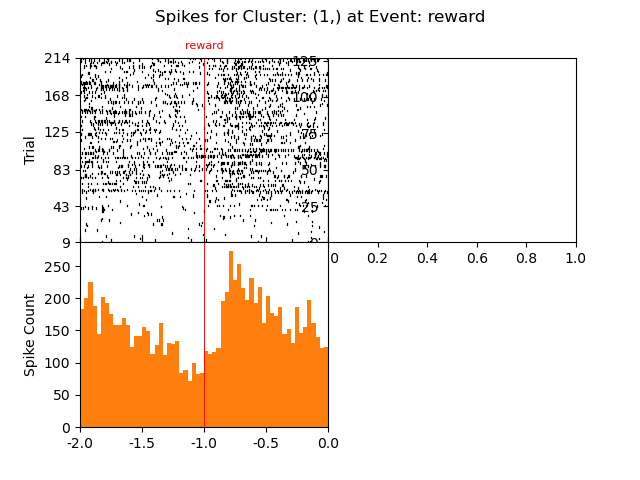

In [62]:
cluster = 1, 
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]
#selected_trials = spikes.trials_df[spikes.trials_df['select']==True]


event = 'reward'
window = 2000

fig=None
ax=None
title=None

#=============================

# create plot subplot layout & populate with hist & spike trains

fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw={'hspace': 0, 'wspace':0})
ax[-1, -1].axis('off')

#spike & hist plot
# share x axis
ax[0,0].get_shared_x_axes().join(ax[0,0], ax[1,0])
ax_hist_train = ax[[0,1],[0,0]]
fig, ax_hist_train = spikes.plt_spike_train_hist(1, selected_trials, 'reward', 2000, fig, ax=ax_hist_train)

# trial hist plot
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])


plt.show()



#===========================

cluster_df = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == cluster]['spike_times']
trials = selected_trials[event]
delta = window*20



# loop that iterats trough all indeces in trial df
y = 0

hist_tr = pd.DataFrame(columns=['spike count'])
hist_tr.index.name = 'trial'



for row in trials.index:
    # define length of spike for row
    ypos = [y, y+1]
    y+=1
    # derive spike times in range delta around event time for trial
    ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
    ar = ar.astype('int64')
    ar = ar - trials[row]
    
    series = pd.Series([ar.size], index=['spike count'])
    series.name = row
    hist_tr = hist_tr.append(series)
    
    if ar.size > 0:
        #append to historam data frame
        if 'hist_sp' in locals():
            hist_sp = np.append(hist_sp, ar)
        else:
            hist_sp = ar
        # iterate trough all elements of np array
        for col in ar:
            ## plot spike train=========================
            ax[0,0].plot([col, col], ypos, 'k-', linewidth=0.8)

## traw red line at event ==============
ax[0,0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
# spike train y lable
ax[0,0].set_ylabel('Trial')




# set y axis 1. plot
# set ticks
step = trials.index.size/5
start = 0
stop = trials.index.size+step/2
ax[0,0].set_yticks(np.arange(start, stop, step).astype(int))
# set tick labels
stop = trials.index.size
label = trials.index.values[np.arange(start, stop, step).astype(int)]
label = np.append(label, trials.index.values[-1])
ax[0,0].set_yticklabels(label)
# set y limits 1. plot
ax[0,0].set_ylim([0, stop])




#labels
# specify y tick distance
#ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
# trun x labels inside
ax[0,0].tick_params(axis="x",direction="in")
# turn of labels on shared x axis only ticks
plt.setp(ax[0,0].get_xticklabels(), visible=False)
# write event
ax[0,0].set_title(event, color='red', fontsize=8)

## plot histogram===========================
num_bins = 60
# draw histogram
ax[1,0].hist(hist_sp, bins=num_bins)
# draw red line at event
ax[1,0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
# naming y axis
ax[1,0].set_ylabel('Spike Count')
# set x ticks to seconds
if window > 1000:
    window = window/1000
step = window/4
start = -window
stop = window+(step/2)
y_index = np.arange(start, stop, step)
ax[1,0].set_xticklabels(y_index)
# set ticks top and bottom
ax[1,0].tick_params(axis='x', bottom=True, top=True)
# set x limits
ax[1,0].set_xlim([-delta, delta])
#ax.set_title('Spikes for Cluster 1')
if title == None:
    fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
else:
    fig.suptitle(title)
# naming
plt.xlabel('Sampling Points [ms]')

plt.show()

<IPython.core.display.Javascript object>


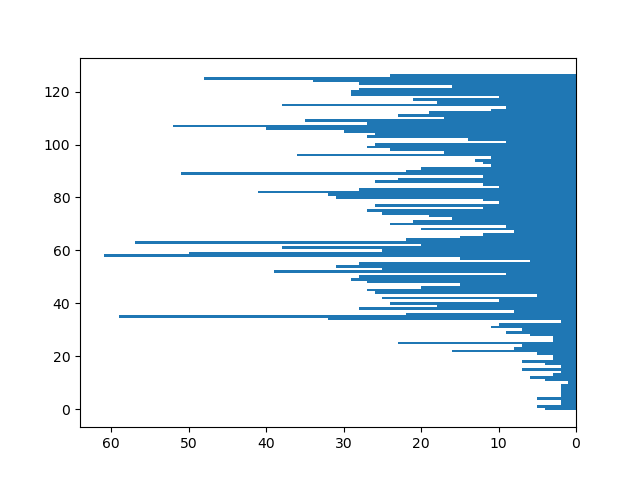

In [100]:
plt.gcf().clear()

#pos = hist_tr.index.values
pos = np.arange(0, hist_tr.size).astype(float)


values = hist_tr.values.reshape([hist_tr.values.size]).astype(float)

plt.barh(pos, values, height=1.0)
plt.gca().invert_xaxis()
plt.show()

<IPython.core.display.Javascript object>


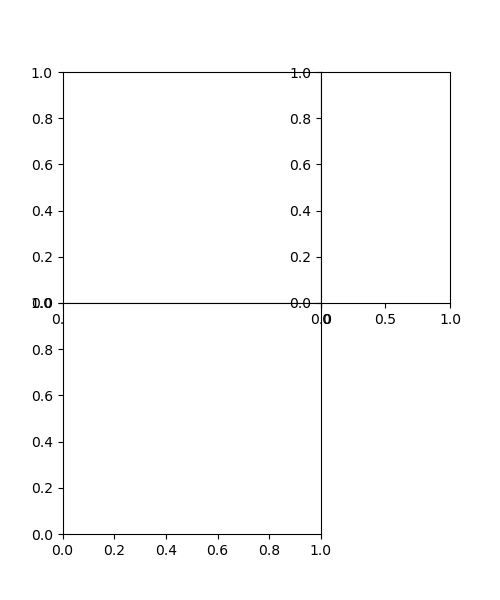

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F68C7C288>,
        None]], dtype=object)

In [141]:
fig = plt.figure(figsize=(5,6))
gs = fig.add_gridspec(2, 3,  hspace=0, wspace=0)

ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax2.get_shared_x_axes().join(ax1, ax2)

ax3 = fig.add_subplot(gs[0, 2])
ax3.get_shared_y_axes().join(ax1, ax3)

#fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw={'hspace': 0, 'wspace':0})
ax=np.array([[ax1, ax2],[ax3,None]])
ax

In [142]:
#ax[0,0].get_shared_x_axes().join(ax[0,0], ax[1,0])
ax[0,0]

<IPython.core.display.Javascript object>


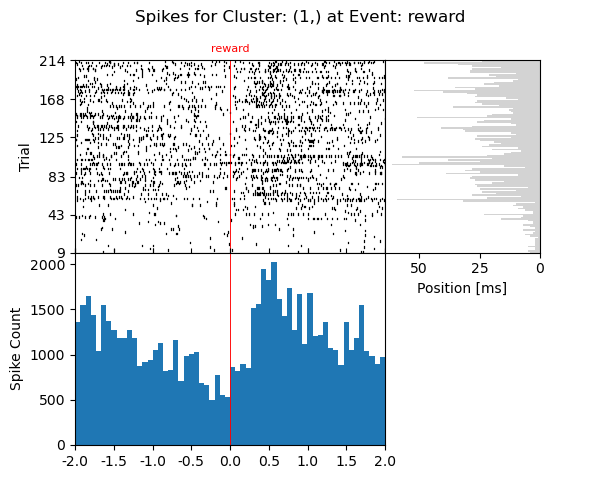

In [168]:
cluster = 1, 
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]
#selected_trials = spikes.trials_df[spikes.trials_df['select']==True]


event = 'reward'
window = 2000

fig=None
ax=None
title=None

#=============================

# create plot subplot layout & populate with hist & spike trains
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, 3,  hspace=0, wspace=0)

ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax2.get_shared_x_axes().join(ax1, ax2)

ax3 = fig.add_subplot(gs[0, 2])
ax3.get_shared_y_axes().join(ax1, ax3)

#fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw={'hspace': 0, 'wspace':0})
ax=np.array([[ax1, ax3],[ax2,None]])

#ax[-1, -1].axis('off')

#spike & hist plot
# share x axis
ax[0,0].get_shared_x_axes().join(ax[0,0], ax[1,0])
ax_hist_train = ax[[0,1],[0,0]]
fig, ax_hist_train = spikes.plt_spike_train_hist(1, selected_trials, 'reward', 2000, fig, ax=ax_hist_train)

# trial hist plot
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])


plt.show()



#===========================

cluster_df = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == cluster]['spike_times']
trials = selected_trials[event]
delta = window*20



# loop that iterats trough all indeces in trial df
y = 0

hist_tr = pd.DataFrame(columns=['spike count'])
hist_tr.index.name = 'trial'



for row in trials.index:
    # define length of spike for row
    ypos = [y, y+1]
    y+=1
    # derive spike times in range delta around event time for trial
    ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
    ar = ar.astype('int64')
    ar = ar - trials[row]
    
    series = pd.Series([ar.size], index=['spike count'])
    series.name = row
    hist_tr = hist_tr.append(series)
    
    if ar.size > 0:
        #append to historam data frame
        if 'hist_sp' in locals():
            hist_sp = np.append(hist_sp, ar)
        else:
            hist_sp = ar
        # iterate trough all elements of np array
        for col in ar:
            ## plot spike train=========================
            ax[0,0].plot([col, col], ypos, 'k-', linewidth=0.8)

## traw red line at event ==============
ax[0,0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
# spike train y lable
ax[0,0].set_ylabel('Trial')




# set y axis 1. plot
# set ticks
step = trials.index.size/5
start = 0
stop = trials.index.size+step/2
ax[0,0].set_yticks(np.arange(start, stop, step).astype(int))
# set tick labels
stop = trials.index.size
label = trials.index.values[np.arange(start, stop, step).astype(int)]
label = np.append(label, trials.index.values[-1])
ax[0,0].set_yticklabels(label)
# set y limits 1. plot
ax[0,0].set_ylim([0, stop])




#labels
# specify y tick distance
#ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
# trun x labels inside
ax[0,0].tick_params(axis="x",direction="in")
# turn of labels on shared x axis only ticks
plt.setp(ax[0,0].get_xticklabels(), visible=False)
# write event
ax[0,0].set_title(event, color='red', fontsize=8)

## plot histogram spikes ===========================
num_bins = 60
# draw histogram
ax[1,0].hist(hist_sp, bins=num_bins, color="tab:blue")
# draw red line at event
ax[1,0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
# naming y axis
ax[1,0].set_ylabel('Spike Count')
# set x ticks
step = delta/4
start = -delta
stop = delta+(step/2)
x_ticks = np.arange(start, stop, step)
ax[1,0].set_xticks(x_ticks)
# set x ticks labels to seconds
if window > 1000:
    window = window/1000
step = window/4
start = -window
stop = window+(step/2)
x_labels = np.arange(start, stop, step)
ax[1,0].set_xticklabels(x_labels)
# set ticks top and bottom
ax[1,0].tick_params(axis='x', bottom=True, top=True)
# set x limits
ax[1,0].set_xlim([-delta, delta])



## plot histogram trials =================================
#pos = hist_tr.index.values
pos = np.arange(0, hist_tr.size).astype(float)
#values
values = hist_tr.values.reshape([hist_tr.values.size]).astype(float)
# invert axis 
ax[0,1].invert_xaxis()
# remove ticks
ax[0,1].set_yticks([])

# plot histogram
ax[0,1] = plt.barh(pos, values, height=1.0, color='lightgray')


#ax.set_title('Spikes for Cluster 1')
if title == None:
    fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
else:
    fig.suptitle(title)
# naming
plt.xlabel('Position [ms]')

plt.show()

<IPython.core.display.Javascript object>


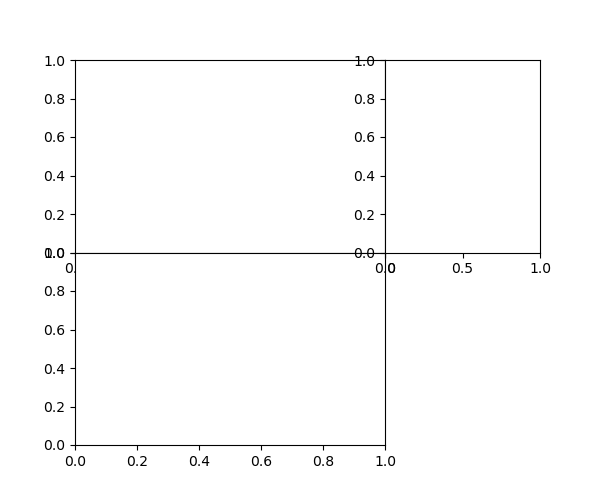

In [171]:
cluster = 1, 
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]
#selected_trials = spikes.trials_df[spikes.trials_df['select']==True]


event = 'reward'
window = 2000

fig=None
ax=None
title=None

#=============================

# create plot subplot layout & populate with hist & spike trains
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, 3,  hspace=0, wspace=0)

ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax2.get_shared_x_axes().join(ax1, ax2)

ax3 = fig.add_subplot(gs[0, 2])
ax3.get_shared_y_axes().join(ax1, ax3)

#fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw={'hspace': 0, 'wspace':0})
ax=np.array([[ax1, ax3],[ax2,None]])

#ax[-1, -1].axis('off')

#spike & hist plot
# share x axis
ax1.get_shared_x_axes().join(ax1, ax2)


#===========================
def save_plt_spike_train_hist_reward(cluster, selected_trials, event, window, fig=None, ax=[None, None, None], title=None):
    # create necessary variables
    cluster_df = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20

    # create fig, gird and axis
    if any(i==None for i in ax)or fig==None:
        #create figure with shape
        fig = plt.figure(figsize=(6,5))
        # create gridspecs
        gs = fig.add_gridspec(2, 3,  hspace=0, wspace=0)
        # create axis for hist spike train
        ax1 = fig.add_subplot(gs[0, :2])
        ax2 = fig.add_subplot(gs[1, :2])
        ax2.get_shared_x_axes().join(ax1, ax2)
        # create axis for trial hist
        ax3 = fig.add_subplot(gs[0, 2])
        ax3.get_shared_y_axes().join(ax1, ax3)

    # loop that iterats trough all indeces in trial df
    y = 0
    # loop for hist trial plot
    hist_tr = pd.DataFrame(columns=['spike count'])
    hist_tr.index.name = 'trial'

    ##spike train plot ========================
    # share x axis
    ax=np.array([[ax1, ax3],[ax2,None]])
    # main loop over each trial
    for row in trials.index:
        # define length of spike for row
        ypos = [y, y+1]
        y+=1
        # derive spike times in range delta around event time for trial
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row]
        # create hist trial dataframe
        series = pd.Series([ar.size], index=['spike count'])
        series.name = row
        hist_tr = hist_tr.append(series)
        # add to histogram array
        if ar.size > 0:
            #append to historam data frame
            if 'hist_sp' in locals():
                hist_sp = np.append(hist_sp, ar)
            else:
                hist_sp = ar
            # iterate trough all elements of np array
            for col in ar:
                ## plot spike train=========================
                ax1.plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event 
    ax1.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax1.set_ylabel('Trial')

    ## set y axis 1. plot
    # set ticks
    step = trials.index.size/5
    start = 0
    stop = trials.index.size+step/2
    ax1.set_yticks(np.arange(start, stop, step).astype(int))
    # set tick labels
    stop = trials.index.size
    label = trials.index.values[np.arange(start, stop, step).astype(int)]
    label = np.append(label, trials.index.values[-1])
    ax1.set_yticklabels(label)
    # set y limits 1. plot
    ax1.set_ylim([0, stop])

    ##labels
    # trun x labels inside
    ax1.tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax1.get_xticklabels(), visible=False)
    # write event
    ax1.set_title(event, color='red', fontsize=8)


    ## plot histogram spikes ===========================
    num_bins = 60
    # draw histogram
    ax2.hist(hist_sp, bins=num_bins, color="tab:blue")
    # draw red line at event
    ax2.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax2.set_ylabel('Spike Count')
    # set x ticks
    step = delta/4
    start = -delta
    stop = delta+(step/2)
    x_ticks = np.arange(start, stop, step)
    ax2.set_xticks(x_ticks)
    # set x ticks labels to seconds
    if window > 1000:
        window = window/1000
    step = window/4
    start = -window
    stop = window+(step/2)
    x_labels = np.arange(start, stop, step)
    ax2.set_xticklabels(x_labels)
    # set ticks top and bottom
    ax2.tick_params(axis='x', bottom=True, top=True)
    # set x limits
    ax2.set_xlim([-delta, delta])



    ## plot histogram trials =================================
    #pos = hist_tr.index.values
    pos = np.arange(0, hist_tr.size).astype(float)
    #values
    values = hist_tr.values.reshape([hist_tr.values.size]).astype(float)
    # invert axis 
    ax3.invert_xaxis()
    # remove ticks
    ax3.set_yticks([])

    ## plot histogram
    ax3 = plt.barh(pos, values, height=1.0, color='lightgray')

    # name main title
    #ax.set_title('Spikes for Cluster 1')
    if title == None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    else:
        fig.suptitle(title)
    # naming
    plt.xlabel('Position [ms]')

    return fig, (ax1, ax2, ax3)

In [ ]:
cluster = 1, 
selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) | (spikes.trials_df['event']==7) ) ][:]
#selected_trials =  spikes.trials_df.loc[ (spikes.trials_df['select'] == True) & ( (spikes.trials_df['event']==5) ) ][:]
#selected_trials = spikes.trials_df[spikes.trials_df['select']==True]


event = 'reward'
window = 2000

fig=None
ax=None
title=None

In [ ]:
    # create plot subplot layout & populate with hist & spike trains
    fig = plt.figure(figsize=(6,5))
    gs = fig.add_gridspec(2, 3,  hspace=0, wspace=0)

    ax1 = fig.add_subplot(gs[0, :2])
    ax2 = fig.add_subplot(gs[1, :2])
    ax2.get_shared_x_axes().join(ax1, ax2)

    ax3 = fig.add_subplot(gs[0, 2])
    ax3.get_shared_y_axes().join(ax1, ax3)

    #fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw={'hspace': 0, 'wspace':0})
    ax=np.array([[ax1, ax3],[ax2,None]])

    #ax[-1, -1].axis('off')

    #spike & hist plot
    # share x axis
    ax[0,0].get_shared_x_axes().join(ax[0,0], ax[1,0])
    ax_hist_train = ax[[0,1],[0,0]]
    fig, ax_hist_train = spikes.plt_spike_train_hist(1, selected_trials, 'reward', 2000, fig, ax=ax_hist_train)

    # trial hist plot
    ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])


    plt.show()




In [ ]:

    #===========================
def save_plt_spike_train_hist_reward(self, window, update=False):
    cluster_df = spikes.spikes_df[spikes.spikes_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20



    # loop that iterats trough all indeces in trial df
    y = 0

    hist_tr = pd.DataFrame(columns=['spike count'])
    hist_tr.index.name = 'trial'



    for row in trials.index:
        # define length of spike for row
        ypos = [y, y+1]
        y+=1
        # derive spike times in range delta around event time for trial
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row]

        series = pd.Series([ar.size], index=['spike count'])
        series.name = row
        hist_tr = hist_tr.append(series)

        if ar.size > 0:
            #append to historam data frame
            if 'hist_sp' in locals():
                hist_sp = np.append(hist_sp, ar)
            else:
                hist_sp = ar
            # iterate trough all elements of np array
            for col in ar:
                ## plot spike train=========================
                ax[0,0].plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event ==============
    ax[0,0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax[0,0].set_ylabel('Trial')




    # set y axis 1. plot
    # set ticks
    step = trials.index.size/5
    start = 0
    stop = trials.index.size+step/2
    ax[0,0].set_yticks(np.arange(start, stop, step).astype(int))
    # set tick labels
    stop = trials.index.size
    label = trials.index.values[np.arange(start, stop, step).astype(int)]
    label = np.append(label, trials.index.values[-1])
    ax[0,0].set_yticklabels(label)
    # set y limits 1. plot
    ax[0,0].set_ylim([0, stop])




    #labels
    # specify y tick distance
    #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
    # trun x labels inside
    ax[0,0].tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax[0,0].get_xticklabels(), visible=False)
    # write event
    ax[0,0].set_title(event, color='red', fontsize=8)

    ## plot histogram spikes ===========================
    num_bins = 60
    # draw histogram
    ax[1,0].hist(hist_sp, bins=num_bins, color="tab:blue")
    # draw red line at event
    ax[1,0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax[1,0].set_ylabel('Spike Count')
    # set x ticks
    step = delta/4
    start = -delta
    stop = delta+(step/2)
    x_ticks = np.arange(start, stop, step)
    ax[1,0].set_xticks(x_ticks)
    # set x ticks labels to seconds
    if window > 1000:
        window = window/1000
    step = window/4
    start = -window
    stop = window+(step/2)
    x_labels = np.arange(start, stop, step)
    ax[1,0].set_xticklabels(x_labels)
    # set ticks top and bottom
    ax[1,0].tick_params(axis='x', bottom=True, top=True)
    # set x limits
    ax[1,0].set_xlim([-delta, delta])



    ## plot histogram trials =================================
    #pos = hist_tr.index.values
    pos = np.arange(0, hist_tr.size).astype(float)
    #values
    values = hist_tr.values.reshape([hist_tr.values.size]).astype(float)
    # invert axis 
    ax[0,1].invert_xaxis()
    # remove ticks
    ax[0,1].set_yticks([])

    # plot histogram
    ax[0,1] = plt.barh(pos, values, height=1.0, color='lightgray')


    #ax.set_title('Spikes for Cluster 1')
    if title == None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    else:
        fig.suptitle(title)
    # naming
    plt.xlabel('Position [ms]')


---

In [ ]:
# save images of spike train and histogram plot for all good clusters for all events in trials
# iterate over all trials in trial
path = (folder + r"\figures\spikes\spike-train-hist-event\good\reward_and_noreward" )
import os
if not os.path.isdir(path):
    os.makedirs(path) 
    
for cluster in sapikes.clusters_df.loc[spikes.clusters_df['group']=='good'].index:
    plt_spike_train_hist_event(cluster, 'reward', 2, True, path)